In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score

El dataset wine contiene información para medir la calidad de dos tipologías de vino en base a sus composiciones:

In [ ]:
vino = pd.read_csv("wine.csv")

In [ ]:
vino.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.77        1.90  2.68               17.1      115.0           3.00   
1    14.38        3.59  2.28               16.0      102.0           3.25   
2    12.34        2.45  2.46               21.0       98.0           2.56   
3    12.64        1.36  2.02               16.8      100.0           2.02   
4    12.08        1.13  2.51               24.0       78.0           2.00   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        2.79                  0.39             1.68             6.30  1.13   
1        3.17                  0.27             2.19             4.90  1.04   
2        2.11                  0.34             1.31             2.80  0.80   
3        1.41                  0.53             0.62             5.75  0.98   
4        1.58                  0.40             1.40             2.20  1.31   

   od280/od315_of_diluted_wines  proline  Wine_type  
0                          2.93   1375.0          0  
1                          3.44   1065.0          0  
2                          3.38    438.0          1  
3                          1.59    450.0          1  
4                          2.72    630.0          1

Valores nulos:

In [ ]:
vino.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Wine_type                       0
dtype: int64

Distribución de la variable tipo de vino:

In [ ]:
sns.countplot(vino['Wine_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


¿Cuáles son las variables con mayor correlación lineal en relación a la variable objetivo Wine_quality?

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(vino.corr(), annot=True, cmap='coolwarm')

In [ ]:
vino.corr().Wine_type.sort_values(ascending=False)[1:]

alcalinity_of_ash               0.470437
nonflavanoid_phenols            0.337489
hue                            -0.017043
malic_acid                     -0.044302
proanthocyanins                -0.249205
ash                            -0.354548
magnesium                      -0.383085
od280/od315_of_diluted_wines   -0.391746
total_phenols                  -0.532692
flavanoids                     -0.610730
color_intensity                -0.750613
alcohol                        -0.824399
proline                        -0.845296
Name: Wine_type, dtype: float64

Las variables de mayor correlación son:

In [ ]:
vino_filter = vino[["proline","alcohol","color_intensity",
                    "flavanoids","total_phenols", "Wine_type"]]

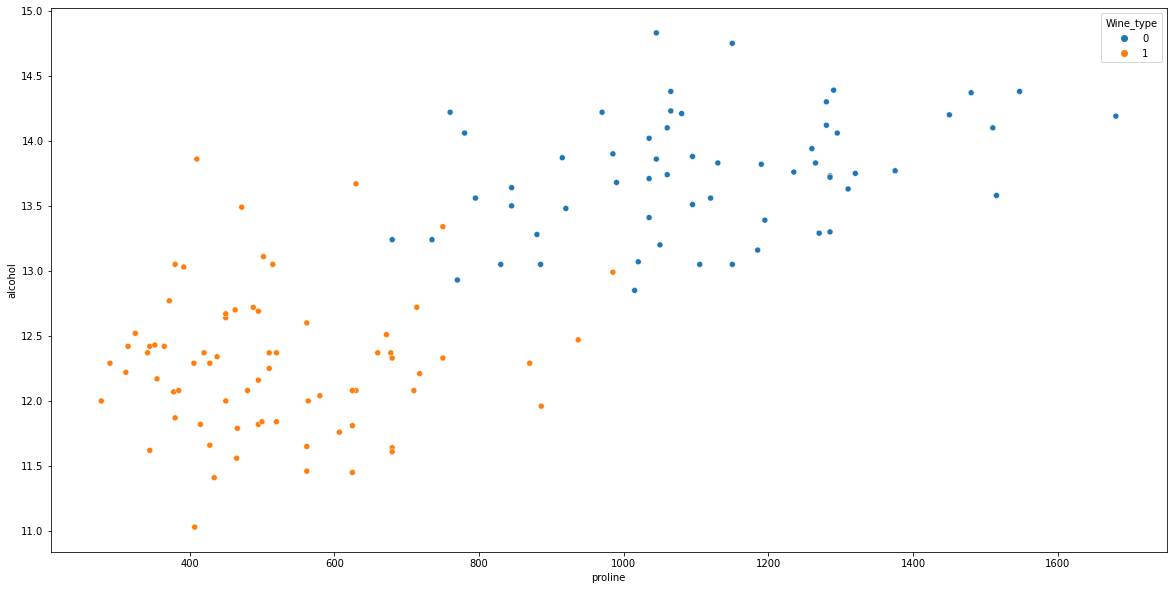

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=vino_filter, x="proline", y="alcohol", hue="Wine_type")

División de los datos en entrenamiento y test:

In [ ]:
X = vino.drop("Wine_type", axis = 1)
y = vino["Wine_type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

####Construcción del modelo:

Definición de cada uno de los modelos estimadores por separado:

In [ ]:
lgclassifier = LogisticRegression(random_state=123)
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
SVCclassifier = SVC()

Agrupación de los modelos estimadores:

In [ ]:
estimators = [
     ('log_reg', lgclassifier),
     ('knn', knnclassifier),
     ('svc',SVCclassifier)
]

Definición del modelo:

In [ ]:
sclf = StackingClassifier(estimators=estimators)

Entrenamiento del modelo:

In [ ]:
sclf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

StackingClassifier(estimators=[('log_reg',
                                LogisticRegression(random_state=123)),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())])

Predicción del modelo:

In [ ]:
pred_test = sclf.predict(X_test)

**[EJERCICIO] Pinta la curva ROC con las predicciones de test. ¿Cuál es el AUC?**

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred_test)
roc_auc = roc_auc_score(y_test, pred_test)

Visualización de la curva:

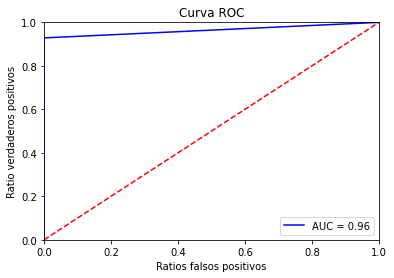

In [ ]:
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Ratio verdaderos positivos')
plt.xlabel('Ratios falsos positivos')
plt.show()

Del mismo modo que contamos con Stacking para clasificación, existe también una función que permite resolver problemas de regresión: StackingRegressor (puedes echar un ojo a la documentación aquí: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)